# 0 - Keras: Redes Neurais

Neste projeto será usado Iris dataset, é um conjunto de dados bem conhecido na comunidade academica, esse conjunto de dados consiste em 50 amostras de cada uma das três espécies (150 amostras, no total) de Iris: *Iris setosa, Iris virginica e Iris versicolor*.

Quatro variáveis foram medidas em cada amostra: o comprimento (*length*) e a largura (*width*) das sépalas (*Sepal*) e pétalas (*Petal*), em centímetros. Com base na combinação dessas quatro características, é possível distinguir as espécies umas das outras.

![](https://kedro.readthedocs.io/en/0.17.5/_images/iris_measurements.png)

Abaixo a representação dos três tipos de flores Iris.

![](https://www.embedded-robotics.com/wp-content/uploads/2022/01/Iris-Dataset-Classification.png)

In [32]:
# bibliotecas que serão usadas

from tensorflow import keras
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd

## 1 - Modelo - Perceptron

O [`keras.Sequential`](https://keras.io/api/models/sequential/) permite a criação de uma rede neural unindo camadas.

A camada [`Dense`](https://keras.io/api/layers/core_layers/dense/) é uma camada definida no Keras que promove os cálculos e transformações utilizadas na criação de um modelo.

Precisamos definir nela quantos neurônios ela conterá através do parâmetro `units` e podemos também definir a quantidade de entradas/características que os dados irão conter, para a implementação, vamos começar com dois.

In [33]:
# Criação de um neurônio artificial

modelo = keras.Sequential([keras.layers.Dense(units=1, input_shape=[2], name='Neuronio')])

# units = quantidade de neurônios
# input_shape = Quantidade de caracteristicas que será estudada para classificar
# name = permite nomearmos essa camada.


/home/leonardojdss/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Explicação:**

1. O `Sequential` cria um modelo muito simples (um dos mais simples no Keras) de redes neurais. Desse modo, é construida somente uma única pilha de camadas sequencialmente conectadas.
2. A camada [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) é criada com 1 neurônio, representando o perceptron. A camada é responsável por cada peso contido nela bem como a inputação do vetor de viéses.
  * `units`: informa a quantidade de neurônios que a camada Dense terá;
  * `input_shape`: define a quantidade de entradas no modelo neural; e
  * `name`: permite nomearmos essa camada.

#### Estrutura
Podemos entender a esturtura do modelo (perceptron) criado através do método [`summary`](https://keras.io/api/models/model/#:~:text=%5Bsource%5D-,summary%20method,-Model.summary) e a função [`utils.plot_model`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model) da biblioteca keras.

In [34]:
# Construindo um summary, relatorio da construção do medelo

modelo.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Neuronio (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

**Explicação:**

A única camada que temos é o próprio neurônio que criamos. O parâmetro dado nela é definido como 3 pois é considerado **a soma da quantidade de pesos mais a quantidade de viéses**.

Os pesos são calculados multiplicando a quantidade de neurônios pela quantidade de entradas, desse modo, como definimos 2 entradas e 1 neurônio, teremos `2 * 1 = 2 pesos`, adicionadno o viés que é igual a quantidade de neurônios temos `2 + 1 = 3 parâmetros`.

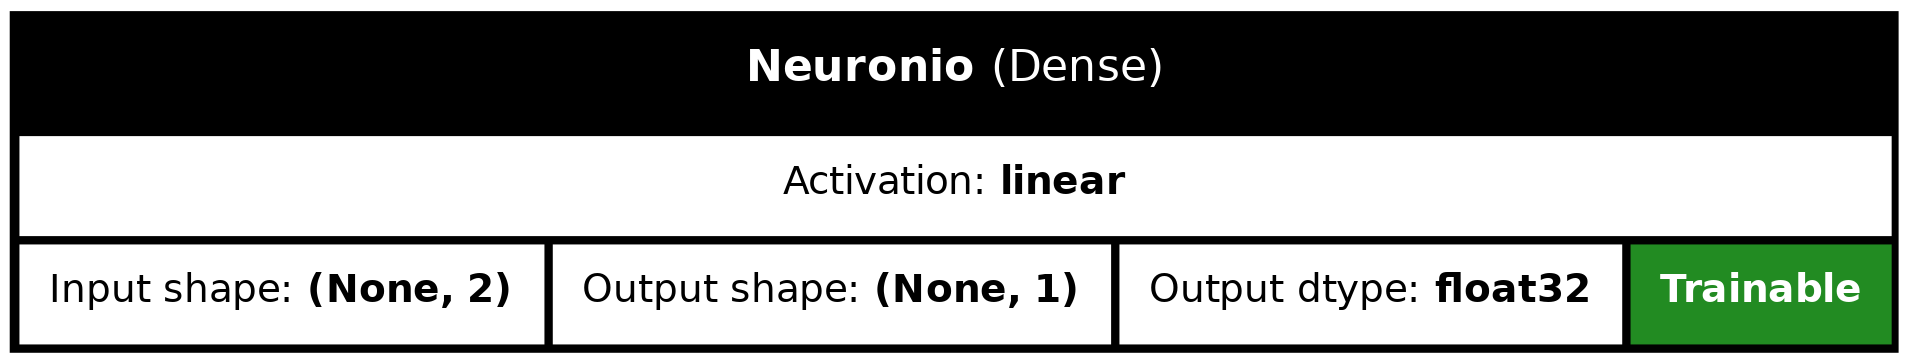

In [35]:
# Construindo um summary, porém em imagem

keras.utils.plot_model(modelo, show_shapes=True, show_trainable=True, show_dtype=True, show_layer_activations=True, show_layer_names=True)

In [36]:
# Pesos e Viéses

modelo.layers[0].get_weights()

[array([[ 0.00724387],
        [-1.0893493 ]], dtype=float32),
 array([0.], dtype=float32)]

In [37]:
pesos, bias = modelo.layers[0].get_weights()
print(pesos.shape)
pesos

(2, 1)


array([[ 0.00724387],
       [-1.0893493 ]], dtype=float32)

In [38]:
print(bias.shape)
bias

(1,)


array([0.], dtype=float32)

# 2 - Inicializador

É possivel definir os pesos e viéses antes de criar o modelo, para isso utilizamos dois paramentros:

* `kernel_initializer`: inicializa a matriz de pesos do modelo; e
* `bias_initializer`: inicializa os valores de viéses.

Para definir os pesos iniciais, utilizamos dois métodos de [`keras.initializers`](https://keras.io/api/layers/initializers/):

* `keras.initializers.RandomNormal()`, para os pesos; e
* `keras.initializers.Ones()`, para o bias.

In [39]:

modelo = keras.Sequential([keras.layers.Dense(units=1, input_shape=[2], name='Neuronio',
    kernel_initializer=keras.initializers.RandomNormal(),
    bias_initializer=keras.initializers.Ones())])

# Pesos e Viéses

modelo.layers[0].get_weights()

/home/leonardojdss/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[array([[-0.01733129],
        [ 0.01468082]], dtype=float32),
 array([1.], dtype=float32)]

## 3 - Estudo de caso flores iris

### 3.1 Importando os dados 

Como mencionado no inicio deste notebook será usado um data set público de flores, será possivel realizar a coleta desse dataset através do método [`datasets`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) da biblioteca `sklearn`.

In [40]:
#importando o dataset

iris = datasets.load_iris(return_X_y=True)
x = iris[0] # caracteristicas
y = iris[1] # target


In [41]:
#Avaliando os dados de X

# x = caracteristicas

x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [42]:
# Consultando os nomes das colunas das caracteristicas

datasets.load_iris()['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [43]:
#Avaliando os dados de y

# y = classificação

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [44]:
# Consultando o nome das variaveis target

datasets.load_iris()['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 0 = setosa
### 1 = versicolor
### 2 = virginica

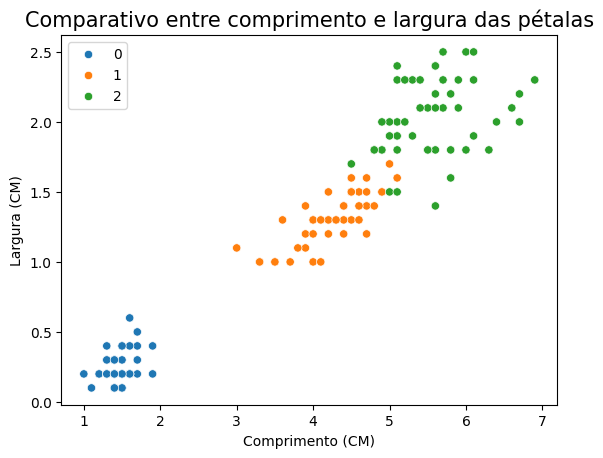

In [45]:
# Plotando um comparativo entre as petalas

sns.scatterplot(x=x[:,2], y=x[:,3], hue=y, palette='tab10')
plt.xlabel('Comprimento (CM)', fontsize=10)
plt.ylabel('Largura (CM)', fontsize=10)
plt.title('Comparativo entre comprimento e largura das pétalas', fontsize=15)
plt.show()

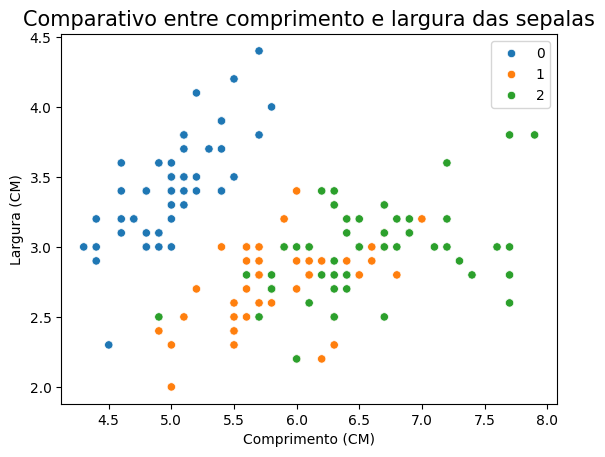

In [46]:
# Plotando um comparativo entre as sepalas

sns.scatterplot(x=x[:,0], y=x[:,1], hue=y, palette='tab10')
plt.xlabel('Comprimento (CM)', fontsize=10)
plt.ylabel('Largura (CM)', fontsize=10)
plt.title('Comparativo entre comprimento e largura das sepalas', fontsize=15)
plt.show()

### 3.2 Tratamento

### 3.2.1 Categorização

In [47]:
y.shape

(150,)

In [48]:
# categorização do y para binario

y = keras.utils.to_categorical(y)
y.shape

(150, 3)

In [49]:
# Avaliando y como binario 

y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

### 3.2.2 Normalização das entradas X

Os dados serão normalizados entre [0, 1], para isso utilizamos o método [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler)

In [50]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

### 3.2.3 Separação do conjunto do treino e teste

A separação é necessária para que o modelo possa o usar o conjunto de treino para realizar o estudo e cálculos para gerar o modelo preditivo que tenha a capacidade de identificar os tipos de flores e no fim comparar com os dados de teste se o motor realmente tem performance.

divisão:

80% TREINO & 20% TESTE

In [51]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size= 0.2, stratify= y, random_state=42)

In [52]:
x_treino.shape

(120, 4)

In [53]:
x_teste.shape

(30, 4)

## 3.3 Modelo - MLP

### 3.3.1 Criação do modelo

Será usado um modelo MLP definido por 1 camada de entrada, 1 camada oculta e 1 camada de saída.

In [54]:
modelo = keras.Sequential([keras.layers.InputLayer(shape=(4,), name='Entrada'),
                            keras.layers.Dense(512,activation='relu', name='Oculta',
                            kernel_initializer=keras.initializers.RandomNormal(seed=142)),
                            keras.layers.Dense(3, activation='softmax', name='Saida')])

In [55]:
modelo.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Oculta (Dense)                  │ (None, 512)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Saida (Dense)                   │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,099 (16.01 KB)

 Trainable params: 4,099 (16.01 KB)

 Non-trainable params: 0 (0.00 B)

### 3.3.2 Treinamento

#### Compilando o modelo:

Compilar o modelo se dá pelo método [`compile`](https://keras.io/api/models/model_training_apis/). Nessa etapa devemos especificar a função de perda e o otimizador a ser usado. Uma opção também é especificar as métricas a serem calculadas durante o treinamento e avaliação do modelo.

In [56]:
modelo.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['categorical_accuracy'])

**Explicação:**

1. A perda escolhida foi a `'categorical_crossentropy'` pois os resultads em y são valores categóricos.
2. O uso do otimizador `'rmsprop'` indica que iremos treinar o modelo baseado em gradiente descendente, que calcula a média móvel de gradientes quadrados para normalizar o gradiente (processo de retropropagação será aplicado ao realizar o treinamento).
3. Por esse modelo ser um classificador simples, é interessante calcular o valor da acurácia durante o treino e validação.

In [57]:
# Treinamento

epocas = 100
historico = modelo.fit(x_treino, y_treino, epochs=epocas, validation_split=0.3)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - categorical_accuracy: 0.3153 - loss: 1.0727 - val_categorical_accuracy: 0.6111 - val_loss: 1.0046
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - categorical_accuracy: 0.6869 - loss: 0.9877 - val_categorical_accuracy: 0.6389 - val_loss: 0.9589
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - categorical_accuracy: 0.6479 - loss: 0.9430 - val_categorical_accuracy: 0.6389 - val_loss: 0.9230
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - categorical_accuracy: 0.7065 - loss: 0.8976 - val_categorical_accuracy: 0.6389 - val_loss: 0.8881
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - categorical_accuracy: 0.6948 - loss: 0.8623 - val_categorical_accuracy: 0.6389 - val_loss: 0.8566
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - categorical_accuracy: 0.6695 - loss: 0.8375 - val_categorical_accuracy: 0.6389 - val_loss: 0.8310
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - categorical_accuracy: 0.7143 - loss: 0.7903 - va

O treinamento é feito com o método `fit`, sendo especificado as entredas e saídas esperadas de treino, épocas e também os dados de validação.

**Explicação:**

1. Para treinamento é preciso passar os dados de entradas e saídas do conjunto de treinamento.
2. Nesse caso o número de épocas também é essencial pois o padrão da biblioteca é 1 época, o que não é tão bom para o aprendizado.
3. Passamos também a porcentagem do conjunto de validação para serem considerados do conjunto de treino - 30% do conjunto de treino

**Interpretando a exibição:**

Exemplo de exibição: 
```
Epoch 100/100
3/3 [━━━━━━━━━━━━━━━━━━━━] - 0s 47ms/step - loss: 0.1451 - categorical_accuracy: 0.9524 - val_loss: 0.1456 - val_categorical_accuracy: 0.9722
```
- A época de treinamento: *`Epoch 100/100`*
- Quantidade de **instâncias processadas**: *`3/3`*
  * Aqui, temos a quantidade de amostras divididas pela número de [batch_size](https://www.deeplearningbook.com.br/o-efeito-do-batch-size-no-treinamento-de-redes-neurais-artificiais/). Normalmente a batch é definida com 32 no keras, temos 84 amostras (70% do conjunto de treino) no treinamento, resultando assim em aproximadamente 3 instâncias.
- A barra de progresso: *`[━━━━━━━━━━━━━━━━━━━━]`*
- Tempo de treinamento de cada amostra: *`0s 13ms/step`*
- Perda e acurária no conjunto de treinamento: *`loss: 0.1506 - categorical_accuracy: 0.9524`*
- Perda e acurária no conjunto de validação: *`val_loss: 0.1494 - val_categorical_accuracy: 0.9722`*

### 3.4 Avaliação

#### Aprendizado:

Podemos avaliar o desempenho do nosso modelo durante o treinamento com os dados de `historico` através do método `history` e plotar o processo de aprendizado

In [58]:
historico.history

{'categorical_accuracy': [0.3571428656578064,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.6904761791229248,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.7023809552192688,
  0.6904761791229248,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.6904761791229248,
  0.6904761791229248,
  0.7142857313156128,
  0.7142857313156128,
  0.761904776096344,
  0.726190447807312,
  0.7023809552192688,
  0.8095238208770752,
  0.738095223903656,
  0.773809552192688,
  0.7976190447807312,
  0.8928571343421936,
  0.8809523582458496,
  0.761904776096344,
  0.8809523582458496,
  0.8690476417541504,
  0.8928571343421936,
  0.8928571343421936,
  0.8690476417541504,
  0.9047619104385376,
  0.8690476417541504,
  0.8928571343421936,
  0.9047619104385376,
  0.9166666865348816,
  0.9285714030265808,
  0.9166666865348816,
  0.9166666865348816,
  0.8928571343421936,
  0.9047619104385376,
  0.916666686

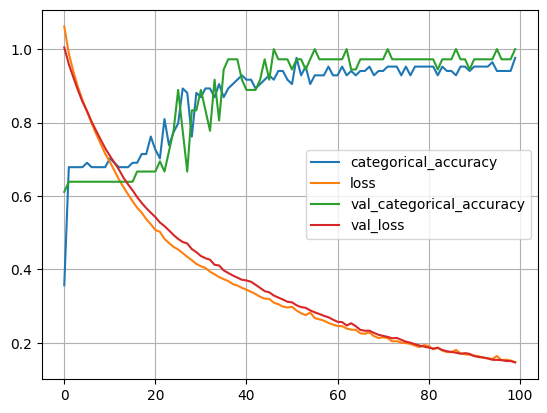

In [59]:
#Plotando desempenho do modelo

pd.DataFrame(historico.history).plot()
plt.grid()
plt.show()

Para observar mais de perto o aprendizado do modelo podemos plotar curvas individuais e perceber como no aprendizado, ambos os conjuntos obtiveram resultados similares. Isso nos garante que não ocorreu sobreajuste no treinamento.

A constancia das curvas é diferente pois os valores de erro  da validação é calculada por época e para o treinamento é feito uma média dos valores de erro durante as iterações de cada época.

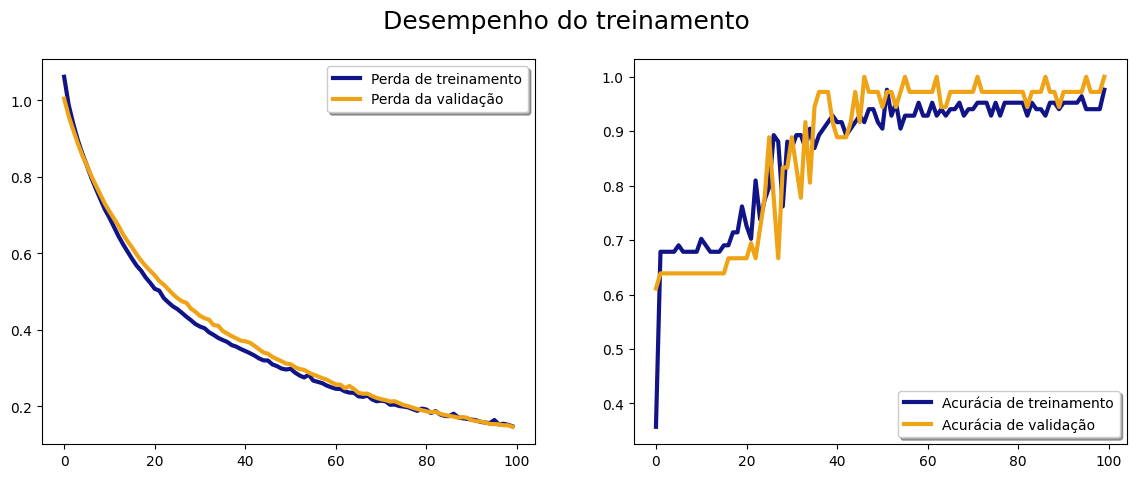

In [60]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(historico.history['loss'], color='#111487', linewidth=3, label="Perda de treinamento")
ax[0].plot(historico.history['val_loss'], color='#EFA316', linewidth=3, label="Perda da validação")
legend = ax[0].legend(loc='best', shadow=True)

# linewidth = espessura da linha
# label = nome do rotulo

ax[1].plot(historico.history['categorical_accuracy'], color='#111487', linewidth=3, label="Acurácia de treinamento")
ax[1].plot(historico.history['val_categorical_accuracy'], color='#EFA316', linewidth=3, label="Acurácia de validação")
legend = ax[1].legend(loc='best', shadow=True)

plt.suptitle('Desempenho do treinamento', fontsize = 18)
plt.show()

#### 3.5 Teste e Conclusão do modelo

Podemos testar o modelo e verificar seu resultado final através do método [`evaluate`](https://keras.io/api/models/model_training_apis/#:~:text=%5Bsource%5D-,evaluate%20method,-Model.evaluate) que nos mostra a perda e acurácia obtida no conjunto de teste.

In [61]:
modelo.evaluate(x_teste, y_teste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - categorical_accuracy: 0.9667 - loss: 0.1618


[0.16183996200561523, 0.9666666388511658]

O método [`predict`](https://keras.io/api/models/model_training_apis/#:~:text=%5Bsource%5D-,predict%20method,-Model.predict) gera a predição do modelo para as entradas enviadas.

Faremos o teste: a entradas `[[0.61, 0.5, 0.69, 0.79]]` pertence as caracteristica da flor virginica, ou seja, o meu modelo  devem resultar em uma indicação de flor Virginica - `[% de ser este, % de ser este, % de ser este]` porque ele aprendeu as suas caracteristicas.

o Y de virginica é igual a `[0, 0, 1]`, então a maior porcentagem precisa estar na terceira coluna

In [62]:
input_data = [[0.61, 0.5, 0.69, 0.79]]
input_data = pd.DataFrame(input_data)

predicao = modelo.predict(input_data)
print(predicao)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[4.2286621e-05 1.8817092e-01 8.1178671e-01]]


### Interpretando o resultado:

`1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step [[4.2286621e-05, 1.8817092e-01, 8.1178671e-01]]`

Primeira coluna = 0.00422%
Segunda Coluna = 18.81%
Terceira Coluna = 81,17%

Em resumo:

`1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step [[0.00422%, 18.81%, 81,17%]]`

Desta forma podemos concluir que ele previu corretamente a flor virginica afirmando que de acordo com as caracteristicas fornecidas a probilidade de ser uma virginica é de 73% 